In [ ]:
import matplotlib.pyplot as plt
#importing necessary packages
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#generating random dataset with numpy
np.random.seed(0)
x = np.random.rand(100, 1)
y = 3 + 5 * x

print('\n First 5 data on the x axis \n', x[:5], '\n\n First 5 data on the y axis \n', y[:5])

#initialise linear regression model
rgr = LinearRegression()

#fit the model
rgr.fit(x,y)

#predict the model
y_pred =rgr.predict(x)
#print(y_pred)

#evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

#printing the model evaluation values
print('\n slope: ', rgr.coef_)
print('Intercept: ', rgr.intercept_)
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

#plotting all values
#plot the data  points for x and y

plt.scatter(x,y, s=10)
plt.xlabel('x')
plt.ylabel('y')

#predicted values
plt.plot(x, y_pred, color='r')
plt.show()


 First 5 data on the x axis 
 [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]] 

 First 5 data on the y axis 
 [[6.42188406]
 [6.84595481]
 [6.7490109 ]
 [6.68660446]
 [5.36702714]]

 slope:  [[4.93655106]]
Intercept:  [3.55808002]
mae:  0.24
mse:  0.08
Root mean square error:  0.28
R2 score:  0.9637291269612669


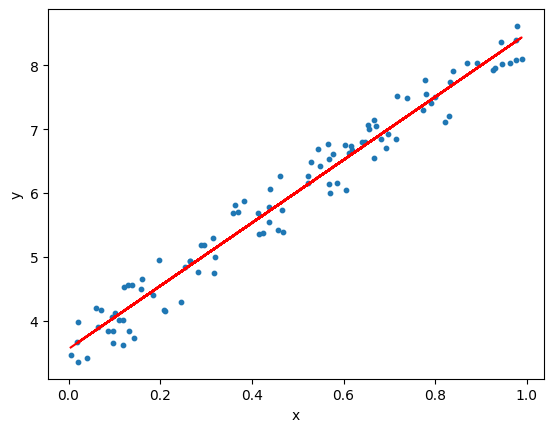

In [17]:
import matplotlib.pyplot as plt
#importing necessary packages
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#generating random dataset with numpy
np.random.seed(0)
x = np.random.rand(100, 1)
y = 3 + 5 * x + np.random.rand(100, 1)

print('\n First 5 data on the x axis \n', x[:5], '\n\n First 5 data on the y axis \n', y[:5])

#initialise linear regression model
rgr = LinearRegression()

#fit the model
rgr.fit(x,y)

#predict the model
y_pred =rgr.predict(x)
#print(y_pred)

#evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

#printing the model evaluation values
print('\n slope: ', rgr.coef_)
print('Intercept: ', rgr.intercept_)
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

#plotting all values
#plot the data  points for x and y

plt.scatter(x,y, s=10)
plt.xlabel('x')
plt.ylabel('y')

#predicted values
plt.plot(x, y_pred, color='r')
plt.show()

using the auto mpg dataset to prepare the data for model fitting

In [25]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#declaring header names
autompg_headers = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

#read the data using the read_csv class
mpg_data = read_csv('venv/auto_mpg_data.csv', names=autompg_headers)

print(mpg_data.head(5))

#check for any missing data
miss_data = mpg_data[mpg_data.isna().any(axis=1)]
print(miss_data)

#check the data information
print('\n', mpg_data.info())

#since the horsepower has an object data type, we convert it to float
mpg_data['horsepower'] = pd.to_numeric(mpg_data['horsepower'], errors='coerce')

#now lets re check or dataframe for missing values
recheck_missing_data = mpg_data[mpg_data.isna().any(axis=1)]
print('\n These are the instances with missing values after to conversion to float \n', recheck_missing_data )

#using the simpleimputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent') #either replace it with most frequent, median, mean and observe
imputer.fit(mpg_data)
new_data = imputer.transform(mpg_data)

#reassign the new dataframe
mpg_data = pd.DataFrame(data=new_data, columns=autompg_headers)

#seperate the data into X(train) anf y(test) groups - training and target sets
train_headers = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

taret_header = ['mpg']

X = mpg_data[train_headers]
y = mpg_data[taret_header]

#get the displacement variable which allows us to carry our simple regression
x = mpg_data.iloc[:, 2].values.reshape((-1, 1)) #  reshape as model may expect 2d or x = mpg_data['displacement']

#get the mpg
y = mpg_data.iloc[:, 0].values

print('\n print x dimension ', x.shape)
print('\n print y dimension ', y.shape)

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
--

Training the data using simple linear regression


  dimension of train data  (278, 1)

  dimension of test data  (120, 1)

 slope:  [-0.06103076]
Intercept:  35.25013010654774
mae:  3.32
mse:  17.84
Root mean square error:  4.22
R2 score:  0.6949301767586249


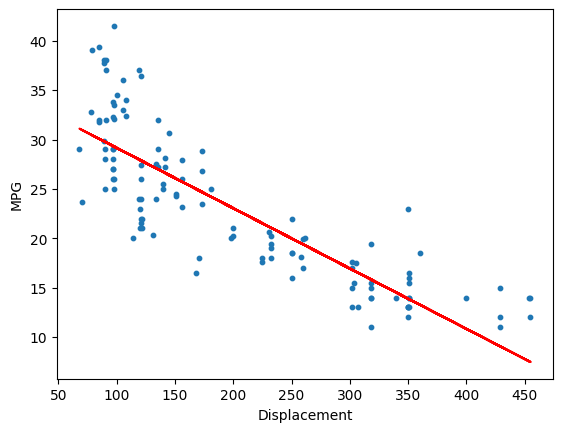

This is the prediction  [24.8138704] 



In [28]:
#split the dataset into 70:30 train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
#check the dimension of train and test data
print('\n  dimension of train data ', x_train.shape)
print('\n  dimension of test data ', x_test.shape)

#perform a linear regression for displacement anf mpg
#initialise the linear regression model
rgr = LinearRegression()

#fit the regression model
rgr.fit(x_train, y_train)

#predict th model
y_pred = rgr.predict(x_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#printing the model evaluation values
print('\n slope: ', rgr.coef_)
print('Intercept: ', rgr.intercept_)
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

#plotting all values
#plot the data  points for x and y

plt.scatter(x_test,y_test, s=10)
plt.xlabel('Displacement')
plt.ylabel('MPG')

#predicted values
plt.plot(x_test, y_pred, color='r')
plt.show()

#we can check the prediction for specific values
pred_my_value = rgr.predict([[171.0]])
print("This is the prediction ", pred_my_value, '\n')

multiple linear regression

In [37]:
#get the variable which allows us to carry out multiple linear regression
X = mpg_data.iloc[:, 1:8].values #drop the car name as due to high cardinality and not being strong predictive

#get the mpg
y = mpg_data.iloc[:, 0].values

#split the data into 70:30 train and test mode
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#check the dimension of train and test data
print('\n  dimension of train data ', X_train.shape)
print('\n  dimension of test data ', X_test.shape)

#initialize the model
rgr = LinearRegression()
#fit the model
rgr.fit(X_train, y_train)
#predict the model on test data
y_pred = rgr.predict(X_test)
#print(y_pred)
#predict the model on train data
y_pred_train = rgr.predict(X_train)
#print(y_pred_train)


#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#printing the model evaluation values
print('\n slope: ', rgr.coef_)
print('Intercept: ', rgr.intercept_)
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

#we can check the prediction for specific values
pred_my_value = rgr.predict([[6, 171.0, 97.0, 2984, 14.5, 75, 1]])
print("This is the prediction ", pred_my_value, '\n')


  dimension of train data  (278, 7)

  dimension of test data  (120, 7)

 slope:  [-0.39912226  0.02232034 -0.014257   -0.0071813   0.08704964  0.79702551
  1.15658328]
Intercept:  -19.449513538151304
mae:  2.31
mse:  8.97
Root mean square error:  2.99
R2 score:  0.8466472315667266
This is the prediction  [21.35631026] 

